In [1]:
from mnist_functions import mnist_class

mnist = mnist_class()
mnist

In [2]:
x, y = mnist.mnist_data_extractor()

In [3]:
x_train, x_test, y_train, y_test = mnist.train_test_split(x, y, 0.2)

In [4]:
import numpy as np

x_train, x_test, y_train, y_test = np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test) 

In [5]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression classifier
# Define the model hyperparameters
params = {
    "solver": "lbfgs",
    "max_iter": 1000,
    "multi_class": "auto",
    "random_state": 8888,
    "tol": 0.1
}
clf = LogisticRegression(**params)
clf.fit(x_train, y_train)

d:\Academics\ML Project\MNIST dataset\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.1
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,8888
,solver,'lbfgs'
,max_iter,1000
,multi_class,'auto'


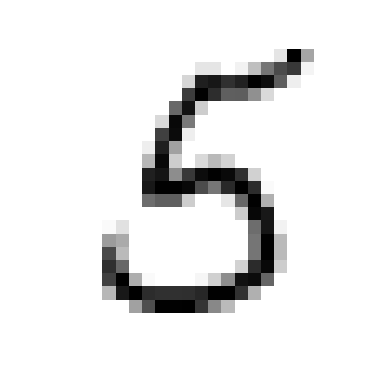

[5]


In [6]:
some_digit = x_train[0]
example = clf.predict([some_digit])

mnist.image_plotter(x_train, 0)
print(example)

In [7]:
model = clf
report = mnist.classification_report(model, x_test, y_test)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.89      0.90      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.86      0.87      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.88      0.87      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



In [8]:
url = "http://127.0.0.1:5000"
experiment_name = "MNIST Experiments"
model_name = "Logistic Regression Classifier"
mnist.ML_Flow(url, experiment_name, params, model, model_name, report)

2025/06/19 02:41:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/19 02:41:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression Classifier at: http://127.0.0.1:5000/#/experiments/978211817872331928/runs/d29a7afeea9444f691eaff3a42bdf293
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978211817872331928


# Experiment 1

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

params_lr = {
    "C": 1,
    "solver": "lbfgs",
    "max_iter": 1000,
    "multi_class": "auto",
    "random_state": 8888,
    "tol": 0.1
}
lr = LogisticRegression(**params_lr)

params_knn = {
    'n_neighbors': 5,
    'metric': 'minkowski',
    'metric_params': None,
}
knn  = KNeighborsClassifier(**params_knn)

params_dt = {
    'criterion': 'gini', 
    'splitter': 'best', 
    'max_depth': None, 
    'min_samples_split': 2, 
    'min_samples_leaf': 1, 
    'min_weight_fraction_leaf': 0.0,
    "random_state": 8888,
}
dt = DecisionTreeClassifier(**params_dt)

params_svm = {
    'kernel': 'rbf',
}
svm = SVC(**params_svm)

params_rf = {
    'max_depth': 32,
    'min_samples_leaf': 4
}
rf = RandomForestClassifier(**params_rf)

lr, knn, dt, svm, rf

(LogisticRegression(C=1, max_iter=1000, multi_class='auto', random_state=8888,
                    tol=0.1),
 KNeighborsClassifier(),
 DecisionTreeClassifier(random_state=8888),
 SVC(),
 RandomForestClassifier(max_depth=32, min_samples_leaf=4))

In [10]:
models = [lr, knn, dt, svm, rf]
models_params = [params_lr, params_knn, params_dt, params_svm, params_rf]
models_name = ['Logistic Regression Classifier', 'K Neighbors Classifier', 'Decision Tree Classifier', 'Support Vector Classifier', 'Random Forest Classifier']

In [11]:
url = "http://127.0.0.1:5000"
experiment_name = "MNIST Experiments"
for i in range(len(models)):
    model = models[i]
    params = models_params[i]
    model_name = models_name[i]
    
    model.fit(x_train, y_train)
    report = mnist.classification_report(model, x_test, y_test)
    mnist.ML_Flow(url, experiment_name, params, model, model_name, report)

d:\Academics\ML Project\MNIST dataset\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
2025/06/19 02:41:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.89      0.90      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.86      0.87      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.88      0.87      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



2025/06/19 02:41:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression Classifier at: http://127.0.0.1:5000/#/experiments/978211817872331928/runs/837b2ec733e04145aba661a109b6327b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978211817872331928


2025/06/19 02:41:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.99      0.93      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



2025/06/19 02:41:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K Neighbors Classifier at: http://127.0.0.1:5000/#/experiments/978211817872331928/runs/5552781ed9294b13a53b5848083b75cd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978211817872331928


2025/06/19 02:41:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1343
           1       0.94      0.96      0.95      1600
           2       0.86      0.83      0.85      1380
           3       0.84      0.85      0.84      1433
           4       0.85      0.87      0.86      1295
           5       0.83      0.81      0.82      1273
           6       0.90      0.91      0.90      1396
           7       0.91      0.91      0.91      1503
           8       0.82      0.82      0.82      1357
           9       0.83      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



2025/06/19 02:41:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree Classifier at: http://127.0.0.1:5000/#/experiments/978211817872331928/runs/f31b91eb89484c1d88187577824d268d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978211817872331928


2025/06/19 02:45:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.96      0.97      1357
           9       0.97      0.96      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



2025/06/19 02:46:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Support Vector Classifier at: http://127.0.0.1:5000/#/experiments/978211817872331928/runs/379b260052514140a09ff440617c151f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978211817872331928


2025/06/19 02:46:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.96      0.95      1380
           3       0.96      0.94      0.95      1433
           4       0.96      0.97      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.98      0.98      0.98      1396
           7       0.96      0.96      0.96      1503
           8       0.95      0.95      0.95      1357
           9       0.95      0.94      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



2025/06/19 02:46:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest Classifier at: http://127.0.0.1:5000/#/experiments/978211817872331928/runs/56a414686fcf4013ab1b43d3aa495665
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978211817872331928


In [12]:
# from sklearn.model_selection import GridSearchCV

# parn_lr = [
#     {'C': 10**np.linspace(-3, 3, 20)}
# ]

# lr = LogisticRegression(solver='lbfgs', max_iter=1000)
# lr_gs = GridSearchCV(lr, parn_lr, cv=10, scoring='accuracy', refit=True)
# lr_gs.fit(x_train, y_train)

# print(lr_gs.best_score_)
# print(lr_gs.best_params_)

# lr_model = lr_gs.best_estimator_
# print('Training Score:', lr_model.score(x_train, y_train))
# print('Testing Score:', lr_model.score(x_test, y_test))

# parn_dt = [
#     {'max_depth': [2, 4, 8, 16, 32, 64]},
#     {'min_samples_leaf': [2, 4, 8, 16]}
# ]

In [13]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier

# params_lr = {
#     "C": 1,
#     "solver": "lbfgs",
#     "max_iter": 1000,
#     "multi_class": "auto",
#     "random_state": 8888,
#     "tol": 0.1
# }
# lr = LogisticRegression(**params_lr)

# params_knn = {
#     'n_neighbors': 5,
#     'metric': 'minkowski',
#     'metric_params': None,
# }
# knn  = KNeighborsClassifier(**params_knn)

# params_dt = {
#     'criterion': 'gini', 
#     'splitter': 'best', 
#     'max_depth': None, 
#     'min_samples_split': 2, 
#     'min_samples_leaf': 1, 
#     'min_weight_fraction_leaf': 0.0,
#     "random_state": 8888,
# }
# dt = DecisionTreeClassifier(**params_dt)

# params_svm = {
#     'kernel': 'rbf',
# }
# svm = SVC(**params_svm)

# params_rf = {
#     'max_depth': 32,
#     'min_samples_leaf': 4
# }
# rf = RandomForestClassifier(**params_rf)

# lr, knn, dt, svm, rf

In [14]:
# params_gs = parn_dt
# model_gs = GridSearchCV(model, params_gs, cv=10, scoring='accuracy', refit=True)

# gs_model = model_gs.best_estimator_
# print(model_name)
# print(model_gs.best_score_)
# print(model_gs.best_params_)

# Experiment 2

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

params_lr = {
    "C": 2,
    "solver": "lbfgs",
    "max_iter": 1000,
    "multi_class": "auto",
    "random_state": 8888,
    "tol": 0.1
}
lr = LogisticRegression(**params_lr)

params_knn = {
    'n_neighbors': 3,
    'metric': 'minkowski',
    'metric_params': None,
}
knn  = KNeighborsClassifier(**params_knn)

params_dt = {
    'criterion': 'gini', 
    'splitter': 'best', 
    'max_depth': None, 
    'min_samples_split': 2, 
    'min_samples_leaf': 1, 
    'min_weight_fraction_leaf': 0.0,
    "random_state": 8888,
}
dt = DecisionTreeClassifier(**params_dt)

params_svm = {
    'kernel': 'rbf',
}
svm = SVC(**params_svm)

params_rf = {
    'max_depth': 64,
    'min_samples_leaf': 2
}
rf = RandomForestClassifier(**params_rf)

lr, knn, dt, svm, rf

(LogisticRegression(C=2, max_iter=1000, multi_class='auto', random_state=8888,
                    tol=0.1),
 KNeighborsClassifier(n_neighbors=3),
 DecisionTreeClassifier(random_state=8888),
 SVC(),
 RandomForestClassifier(max_depth=64, min_samples_leaf=2))

In [16]:
models = [lr, knn, dt, svm, rf]
models_params = [params_lr, params_knn, params_dt, params_svm, params_rf]
models_name = ['Logistic Regression Classifier', 'K Neighbors Classifier', 'Decision Tree Classifier', 'Support Vector Classifier', 'Random Forest Classifier']

url = "http://127.0.0.1:5000"
experiment_name = "MNIST Experiments"
for i in range(len(models)):
    model = models[i]
    params = models_params[i]
    model_name = models_name[i]
    
    model.fit(x_train, y_train)
    report = mnist.classification_report(model, x_test, y_test)
    mnist.ML_Flow(url, experiment_name, params, model, model_name, report)

d:\Academics\ML Project\MNIST dataset\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
2025/06/19 02:46:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.89      0.90      0.90      1433
           4       0.92      0.93      0.92      1295
           5       0.89      0.86      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.94      1503
           8       0.88      0.87      0.87      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



2025/06/19 02:46:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression Classifier at: http://127.0.0.1:5000/#/experiments/978211817872331928/runs/671204af628c4e4a87ff58c929a419ea
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978211817872331928


2025/06/19 02:47:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.96      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.96      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



2025/06/19 02:47:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K Neighbors Classifier at: http://127.0.0.1:5000/#/experiments/978211817872331928/runs/e88bf7b1b1714ea48b406851e9eeb493
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978211817872331928


2025/06/19 02:47:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1343
           1       0.94      0.96      0.95      1600
           2       0.86      0.83      0.85      1380
           3       0.84      0.85      0.84      1433
           4       0.85      0.87      0.86      1295
           5       0.83      0.81      0.82      1273
           6       0.90      0.91      0.90      1396
           7       0.91      0.91      0.91      1503
           8       0.82      0.82      0.82      1357
           9       0.83      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



2025/06/19 02:47:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Decision Tree Classifier at: http://127.0.0.1:5000/#/experiments/978211817872331928/runs/8376ecd0a04a492ca0f0e283a5c44b83
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978211817872331928


2025/06/19 02:51:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.96      0.97      1357
           9       0.97      0.96      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



2025/06/19 02:51:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Support Vector Classifier at: http://127.0.0.1:5000/#/experiments/978211817872331928/runs/4c30f1ce4c104d76b145a37dca20906e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978211817872331928


2025/06/19 02:51:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.96      0.96      1503
           8       0.95      0.95      0.95      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



2025/06/19 02:51:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest Classifier at: http://127.0.0.1:5000/#/experiments/978211817872331928/runs/8c8f598a30de4990aa1fc4a6d14058cf
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/978211817872331928


# Register a Model

In [24]:
# import mlflow

# model_name = 'SVC'
# run_id=input('Please type RunID')
# model_uri = f'runs:/{run_id}/model_name'

# # with mlflow.start_run(run_id=run_id):
# mlflow.register_model(model_uri=model_uri, name=model_name)

# Load the Model

In [18]:
# model_version = 1
# model_uri = f"models:/{model_name}/{model_version}"

# loaded_model = mlflow.xgboost.load_model(model_uri)
# y_pred = loaded_model.predict(x_test)
# y_pred[:4]